In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Datei einlesen
#df = pd.read_csv(r"C:\Users\zahri\anaconda_projects\AsaiProjekt\Asai-Projekt\heart_2020_cleaned.csv")
df = pd.read_csv("/Users/aurelia/Documents/GitHub/Asai-Projekt/heart3.csv")
df_orginal = df.copy()

In [4]:
#DataFrame-Beispiel Daten
styled_df = df.head(10).style.set_table_styles([
    {'selector': 'thead th', 'props': [('background-color', '#1f77b4'), ('color', 'white'), ('font-weight', 'bold')]},
    {'selector': 'tbody td', 'props': [('border', '1px solid #ddd'), ('text-align', 'center')]}
]).set_properties(**{'text-align': 'center'})

styled_df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.000000,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.000000,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.000000,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.500000,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.000000,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.000000,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.000000,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.000000,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.500000,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.000000,Up,0


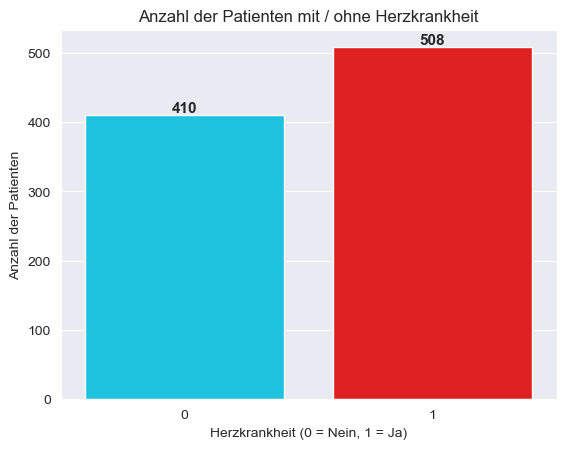

Anzahl der Zeilen (Patienten): 918
Anzahl der Spalten (Features): 12


In [13]:
#Balkendiagramm Anteil Herzerkrankte

# Balkendiagramm OHNE FutureWarning
ax = sns.countplot(x='HeartDisease', hue='HeartDisease', data=df, palette=['#00d9ff', '#ff0000'], legend=False)


# Achsentitel
plt.title('Anzahl der Patienten mit / ohne Herzkrankheit')
plt.xlabel('Herzkrankheit (0 = Nein, 1 = Ja)')
plt.ylabel('Anzahl der Patienten')

# Zahlen über Balken schreiben
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}',
                (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom',
                fontsize=11, fontweight='bold')

# Plot anzeigen
plt.show()
print(f"Anzahl der Zeilen (Patienten): {df.shape[0]}")
print(f"Anzahl der Spalten (Features): {df.shape[1]}")

In [20]:
# Daten Vorverarbeitung
# Duplikate checken
# Alle duplizierten Zeilen (inkl. Erstvorkommen)
duplikate_df = df[df.duplicated(keep=False)]

# Anzahl und Prozent Duplikate
anzahl_duplikate = len(duplikate_df)
gesamt = len(df)
prozent_duplikate = (anzahl_duplikate / gesamt) * 100

# Verteilung HeartDisease in den Duplikaten
verteilung_duplikate = duplikate_df['HeartDisease'].value_counts(normalize=True) * 100

# Verteilung HeartDisease im gesamten DataFrame
verteilung_gesamt = df['HeartDisease'].value_counts(normalize=True) * 100

# Ausgabe
print("Gesamtzeilen:", gesamt)
print("Anzahl mehrfach vorkommender Zeilen:", anzahl_duplikate)
print(f"Prozent mehrfach vorkommend: {prozent_duplikate:.2f}%\n")

print("Verteilung von Heartdisease innerhalb der Duplikate:")
if not verteilung_duplikate.empty:
    for wert, proz in verteilung_duplikate.items():
        print(f"  {wert}: {proz:.2f}%")
else:
    print("    - - -")

print("\nGesamtverteilung HeartDisease:")
for wert, proz in verteilung_gesamt.items():
    print(f"  {wert}: {proz:.2f}%")

Gesamtzeilen: 918
Anzahl mehrfach vorkommender Zeilen: 0
Prozent mehrfach vorkommend: 0.00%

Verteilung von Heartdisease innerhalb der Duplikate:
    - - -

Gesamtverteilung HeartDisease:
  1: 55.34%
  0: 44.66%


In [22]:
# Fehlende Werte prüfen
print(df.isnull().sum())

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


In [27]:
#Typprüfung - gibt es in jeder Spalte wirklich nur den Typen, den es geben soll

expected_types = {
    'Age': int,
    'Sex': 'category',
    'ChestPainType': 'category',
    'RestingBP': int,
    'Cholesterol': int,
    'FastingBS': int,
    'RestingECG': 'category',
    'MaxHR': int,
    'ExerciseAngina': 'category',
    'Oldpeak': float,
    'ST_Slope': 'category',
    'HeartDisease': int
}
def type_check(df, expected_types):
    errors_found = False

    for column, dtype in expected_types.items():
        if column not in df.columns:
            print(f"Column '{column}' wurde nicht im Datensatz gefunden.")
            continue

        series = df[column].dropna()

        # Akzeptierte Typen für category (als String)
        if dtype == 'category':
            accepted_types = (str,)
        else:
            accepted_types = (dtype,)

        invalid_values = series[~series.apply(lambda x: isinstance(x, accepted_types))]

        if not invalid_values.empty:
            errors_found = True
            print(f"Column '{column}' has {len(invalid_values)} wrong values (expected type: {dtype}).")
            print(f"Sample wrong values: {invalid_values.head().to_list()}\n")

    if not errors_found:
        cats = [col for col, t in expected_types.items() if t == 'category']
        print("No type errors found in the dataset.")
        print(f"Checked categories: {cats}")

type_check(df, expected_types)

No type errors found in the dataset.
Checked categories: ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']


In [41]:
# Typprüfung
# also ob wirklich die im Datensatz angegebenen Datentypen und beizeichnungen stimen
def check_values(df, column_type, valid_values):
    if column_type not in df.columns:
        print(f"Spalte '{column_type}' nicht im Datensatz gefunden.")
        return

    values = df[column_type].dropna().unique()
    invalid = set(values).difference(set(valid_values))
    if invalid:
         print(f" Ungültige Werte in Spalte '{column_type}': {(invalid)} ")
    else:
        print(f"Alle Werte in Spalte '{column_type}' sind gültig ")

valid_values_dict = {
    "Sex": {'M', 'F'},
    "ChestPainType": {'TA', 'ATA', 'NAP', 'ASY'},
    "RestingECG": {'Normal', 'ST', 'LVH'},
    "ExerciseAngina": {'Y', 'N'},
    "ST_Slope": {'Up', 'Flat', 'Down'}
}
def check_if_numeric (df, column_type, valid_values):
    if column_type not in df.columns:
        print(f"Spalte {column_type}' nicht im Datensatz gefunden.")
        return
    else:
        non_numeric = df[column_type].dropna().apply(lambda x: not isinstance(x, (int, float)))
        if non_numeric.any():
            count_invalid = non_numeric.sum()
            print(f"{count_invalid} nicht numerische Werte in Spalte '{column_type}'")
            print(f"Beispiele: {df[column_type][non_numeric].unique()[:5]}")
        else:
            print(f"Alle Werte in Spalte '{column_type}' sind numerisch.")

numeric_columns = [
    'Age',
    'RestingBP',
    'Cholesterol',
    'FastingBS',
    'MaxHR',
    'Oldpeak',
    'HeartDisease'
]
# Anwendung:
for column, valid_set in valid_values_dict.items():
    check_values(df, column, valid_set)

for col in numeric_columns:
    check_if_numeric(df, col, numeric_columns)

Alle Werte in Spalte 'Sex' sind gültig 
Alle Werte in Spalte 'ChestPainType' sind gültig 
Alle Werte in Spalte 'RestingECG' sind gültig 
Alle Werte in Spalte 'ExerciseAngina' sind gültig 
Alle Werte in Spalte 'ST_Slope' sind gültig 
Alle Werte in Spalte 'Age' sind numerisch.
Alle Werte in Spalte 'RestingBP' sind numerisch.
Alle Werte in Spalte 'Cholesterol' sind numerisch.
Alle Werte in Spalte 'FastingBS' sind numerisch.
Alle Werte in Spalte 'MaxHR' sind numerisch.
Alle Werte in Spalte 'Oldpeak' sind numerisch.
Alle Werte in Spalte 'HeartDisease' sind numerisch.


In [64]:
# Unrealistische Werte
# aufgrund von Medizinischen Hintergründen
def check_unrealistic_values(df, column, min_val, max_val):
    if column not in df.columns:
        print(f"Spalte'{column}' nicht im Datensatz gefunden.")

    series = df[column]

    invalid = series[(series < min_val) | (series > max_val)]
    if not invalid.empty:
        print(f"{column}: {len(invalid)} Werte außerhalb des akzeptieren Bereichs '{min_val}-{max_val}'")
        print(f"    Beispiele: {invalid.unique()[:5]}")
    else:
        print(f"{column}: Werte innerhalb des akzeptieren Bereichs '{min_val}-{max_val}'")


check_unrealistic_values(df, 'Age', 0, 100)
check_unrealistic_values(df, 'RestingBP', 0, 180)
check_unrealistic_values(df, 'Cholesterol', 0, 800)
check_unrealistic_values(df, 'MaxHR', 60, 202)
check_unrealistic_values(df, 'Oldpeak', 0, 5)


Age: Werte innerhalb des akzeptieren Bereichs '0-100'
RestingBP: 8 Werte außerhalb des akzeptieren Bereichs '0-180'
    Beispiele: [190 200 185 192]
Cholesterol: Werte innerhalb des akzeptieren Bereichs '0-800'
MaxHR: Werte innerhalb des akzeptieren Bereichs '60-202'
Oldpeak: 15 Werte außerhalb des akzeptieren Bereichs '0-5'
    Beispiele: [-0.9 -2.6 -1.5 -0.1 -1. ]


In [69]:
# Formatierung / Behandlung der Unrealistischen Werte
#Oldpeak
df = df[(df['Oldpeak'] >= 0) & (df['Oldpeak'] <= 5)]

print(f"Neue Anzahl an Zeilen: {df.shape[0]}")

Neue Anzahl an Zeilen: 903


=== Altersverteilung ===
count    903.000000
mean      53.519380
std        9.432654
min       28.000000
25%       47.000000
50%       54.000000
75%       60.000000
max       77.000000
Name: Age, dtype: float64


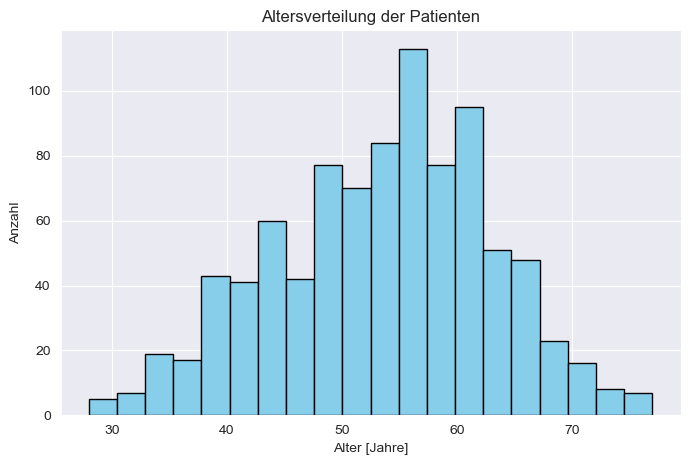


=== Geschlechterverteilung ===
M: 711 Patienten (78.74%)
F: 192 Patienten (21.26%)


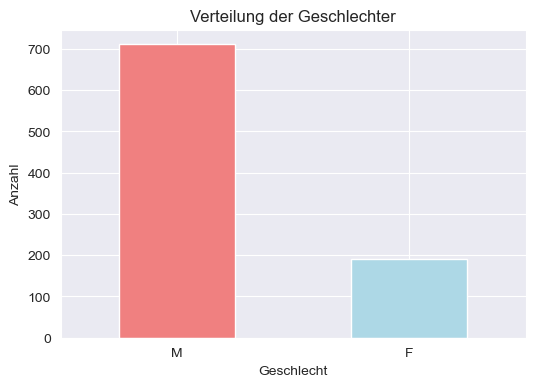

In [70]:
# Bias prüfen
import matplotlib.pyplot as plt

def check_age_gender_bias(df):
    print("=== Altersverteilung ===")
    print(df['Age'].describe())

    plt.figure(figsize=(8,5))
    plt.hist(df['Age'], bins=20, color='skyblue', edgecolor='black')
    plt.title('Altersverteilung der Patienten')
    plt.xlabel('Alter [Jahre]')
    plt.ylabel('Anzahl')
    plt.show()

    print("\n=== Geschlechterverteilung ===")
    gender_counts = df['Sex'].value_counts()
    gender_percent = df['Sex'].value_counts(normalize=True) * 100

    for sex in gender_counts.index:
        print(f"{sex}: {gender_counts[sex]} Patienten ({gender_percent[sex]:.2f}%)")

    plt.figure(figsize=(6,4))
    gender_counts.plot(kind='bar', color=['lightcoral', 'lightblue'])
    plt.title('Verteilung der Geschlechter')
    plt.xlabel('Geschlecht')
    plt.ylabel('Anzahl')
    plt.xticks(rotation=0)
    plt.show()

# Anwendung:
check_age_gender_bias(df)


=== Altersverteilung ===
count    903.000000
mean      53.519380
std        9.432654
min       28.000000
25%       47.000000
50%       54.000000
75%       60.000000
max       77.000000
Name: Age, dtype: float64


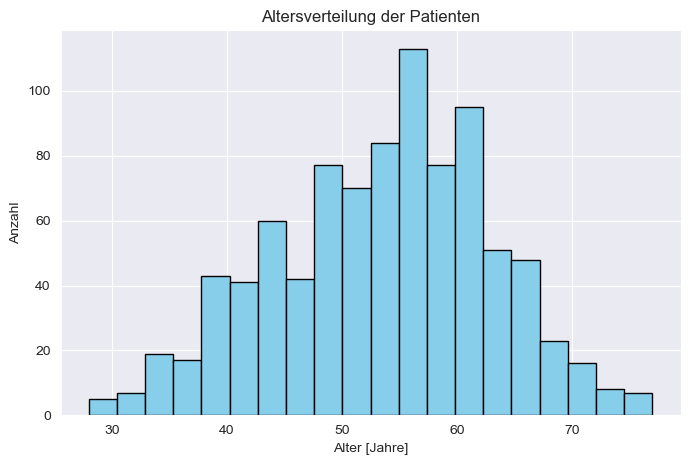

=== Geschlechterverteilung ===
M: 711 Patienten (78.74%)
F: 192 Patienten (21.26%)


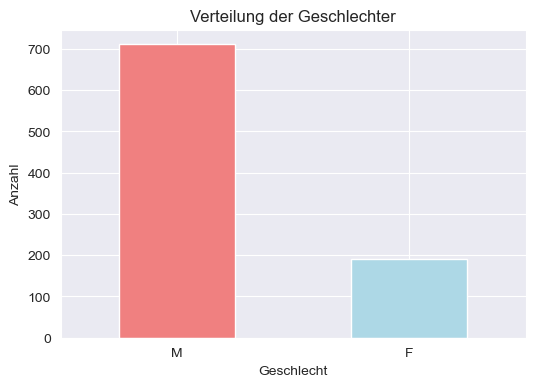

In [71]:
import matplotlib.pyplot as plt

def check_age_distribution(df):
    print("=== Altersverteilung ===")
    print(df['Age'].describe())

    plt.figure(figsize=(8,5))
    plt.hist(df['Age'], bins=20, color='skyblue', edgecolor='black')
    plt.title('Altersverteilung der Patienten')
    plt.xlabel('Alter [Jahre]')
    plt.ylabel('Anzahl')
    plt.show()
def check_gender_distribution(df):
    print("=== Geschlechterverteilung ===")
    gender_counts = df['Sex'].value_counts()
    gender_percent = df['Sex'].value_counts(normalize=True) * 100

    for sex in gender_counts.index:
        print(f"{sex}: {gender_counts[sex]} Patienten ({gender_percent[sex]:.2f}%)")

    plt.figure(figsize=(6,4))
    gender_counts.plot(kind='bar', color=['lightcoral', 'lightblue'])
    plt.title('Verteilung der Geschlechter')
    plt.xlabel('Geschlecht')
    plt.ylabel('Anzahl')
    plt.xticks(rotation=0)
    plt.show()

check_age_distribution(df)
check_gender_distribution(df)
